In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from typing import Dict, Any



In [2]:
test_data = pd.read_csv(r"D:\Data_analytics_new\Sub5_Machine_Learning\Credit-Card-Fraud-Detection-Model\data\raw_data\fraudTest.csv")

In [4]:

def data_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocesses transaction data for fraud detection analysis.
    
    Args:
        df: Raw transaction DataFrame
        
    Returns:
        Preprocessed DataFrame with engineered features
    """
    
    # Helper functions
    def create_amount_bucket(x: float) -> str:
        """Categorize transaction amounts into buckets"""
        if x <= 5.00:
            return "less than 5 dollar"
        elif 5.00 < x <= 10.00:
            return "b/w 5 to 10 dollar"
        elif 10.00 < x <= 40.00:
            return "b/w 10 to 40 dollar"
        elif 40.00 < x <= 60.00:
            return "b/w 40 to 60 dollar"
        elif 60.00 < x <= 80.00:
            return "b/w 60 to 80 dollar"
        elif 80.00 < x <= 150.00:
            return "b/w 80 to 150 dollar"
        else:
            return "more than 150 dollar"
    
    def city_pop_cat(x: float) -> str:
        """Categorize city population"""
        if x <= 1000.00:
            return "Low_pop"
        elif 1000.00 < x <= 10000.00:
            return "Medium_pop"
        else:
            return "High_pop"
    
    def age_bkt(x: int) -> str:
        """Categorize customer age"""
        if x <= 25:
            return "less than 25"
        elif 25 < x <= 40:
            return "b/w 25 to 40"
        elif 40 < x <= 60:
            return "b/w 40 to 60"
        else:
            return "more than 60"
    
    # 1. Amount bucketing
    df["amount_bkt"] = df["amt"].apply(create_amount_bucket)
    
    # 2. Geographical features
    df['latitudinal_distance'] = abs(round(df['merch_lat'] - df['lat'], 3))
    df['longitudinal_distance'] = abs(round(df['merch_long'] - df['long'], 3))
    
    # 3. Population categorization
    df["population_bkt"] = df["city_pop"].apply(city_pop_cat)
    
    # 4. Date/time features
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['trans_date'] = df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    df['trans_date'] = pd.to_datetime(df['trans_date'])
    
    # 5. Age calculation
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (df['trans_date'] - df['dob']).dt.days / 365.25
    df['age'] = df['age'].round(0).astype(int)
    df["age_bkt"] = df["age"].apply(age_bkt)
    
    # 6. Time features
    df['trans_month'] = df['trans_date_trans_time'].dt.month
    df['Month_name'] = df['trans_month'].apply(lambda x: calendar.month_abbr[x])
    df['transaction_time'] = df['trans_date_trans_time'].dt.time
    
    # 7. Time buckets
    bins = [0, 6, 12, 18, 24]
    labels = ['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM']
    df['time_bucket'] = pd.cut(
        df['trans_date_trans_time'].dt.hour,
        bins=bins,
        labels=labels,
        right=False,
        include_lowest=True
    )
    
    # 8. Gender encoding
    df["gender_encod"] = df["gender"].apply(lambda x: 1 if x == "M" else 0)
    
    # 9. Select final columns
    final_columns = [
        "trans_num", "trans_date", "time_bucket", "cc_num", "amount_bkt",
        "category", "gender", "state", "latitudinal_distance",
        "longitudinal_distance", "population_bkt", "age", "age_bkt",
        "gender_encod", "is_fraud"
    ]
    
    return df[final_columns]


In [5]:
processed_data = data_preprocessing(test_data)

In [8]:
processed_data.head(2)

,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,age_bkt,gender_encod,is_fraud
trans_num,,,,,,,,,,,,,,
2da90c7d74bd46a0caf3777415b3ebd3,2020-06-21,12PM-6PM,2291163933867244,less than 5 dollar,personal_care,M,SC,0.02,0.265,High_pop,52,b/w 40 to 60,1,0
324cc204407e99f51b0d6ca0055005e7,2020-06-21,12PM-6PM,3573030041201292,b/w 10 to 40 dollar,personal_care,F,UT,0.87,0.476,Low_pop,30,b/w 25 to 40,0,0


In [7]:
processed_data.set_index("trans_num", inplace=True)

In [9]:
X = processed_data.drop(columns="is_fraud")
y = processed_data.is_fraud

In [10]:
X.head(2)

,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,age_bkt,gender_encod
trans_num,,,,,,,,,,,,,
2da90c7d74bd46a0caf3777415b3ebd3,2020-06-21,12PM-6PM,2291163933867244,less than 5 dollar,personal_care,M,SC,0.02,0.265,High_pop,52,b/w 40 to 60,1
324cc204407e99f51b0d6ca0055005e7,2020-06-21,12PM-6PM,3573030041201292,b/w 10 to 40 dollar,personal_care,F,UT,0.87,0.476,Low_pop,30,b/w 25 to 40,0


In [19]:
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder
from typing import Tuple

def preprocess_and_predict( model_path: str,X ) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Complete pipeline from raw data to predictions:
    1. Preprocesses the data
    2. Encodes categorical features
    3. Loads trained model
    4. Generates predictions
    
    Args:
        raw_data: Raw transaction DataFrame
        model_path: Path to saved model (.pkl or .joblib)
        
    Returns:
        Tuple containing (processed_features, predictions)
    """
    
    # 1. Data Preprocessing
   
    
    # 2. Feature Encoding
    cat_cols = ['time_bucket', 'category', 'amount_bkt', 'population_bkt', 'age_bkt']
    drop_cols = cat_cols + ["trans_date", "cc_num", "gender", "state", "age"]
    
    # Initialize and fit encoder
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_encoded = encoder.fit_transform(X[cat_cols])
    encoded_feat_names = encoder.get_feature_names_out(cat_cols)
    
    # Create encoded DataFrame
    encoded_df = pd.DataFrame(X_encoded, columns=encoded_feat_names, index=X.index)
    
    # Merge with remaining features
    data_processed = X.drop(columns=drop_cols)
    final_features = pd.concat([data_processed, encoded_df], axis=1)
    
 
    # Reindex to ensure correct column order
    #final_features = final_features.reindex(columns=expected_columns, fill_value=0)
    
    # 3. Load Model
    try:
        model = joblib.load(model_path)
        print("Model loaded successfully")
    except Exception as e:
        raise ValueError(f"Error loading model: {str(e)}")
    
    # 4. Generate Predictions
    predictions = model.predict(final_features)
    prediction_probs = model.predict_proba(final_features)[:, 1]  # Fraud probabilities
    
    # Add predictions to DataFrame
    X['predicted_fraud'] = predictions
    X['fraud_probability'] = prediction_probs
    
    return X, predictions

#

In [20]:
model_path = "D:\\Data_analytics_new\\Sub5_Machine_Learning\\Credit-Card-Fraud-Detection-Model\\model\\fraud_detection_model.joblib"

In [21]:
final_df, pred = preprocess_and_predict(model_path, X)

Model loaded successfully


In [24]:
final_df.head(2)

,trans_date,time_bucket,cc_num,amount_bkt,category,gender,state,latitudinal_distance,longitudinal_distance,population_bkt,age,age_bkt,gender_encod,predicted_fraud,fraud_probability
trans_num,,,,,,,,,,,,,,,
2da90c7d74bd46a0caf3777415b3ebd3,2020-06-21,12PM-6PM,2291163933867244,less than 5 dollar,personal_care,M,SC,0.02,0.265,High_pop,52,b/w 40 to 60,1,0,0.00
324cc204407e99f51b0d6ca0055005e7,2020-06-21,12PM-6PM,3573030041201292,b/w 10 to 40 dollar,personal_care,F,UT,0.87,0.476,Low_pop,30,b/w 25 to 40,0,0,0.02


In [27]:
print(final_df["fraud_probability"].min())

0.0


In [30]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming:
# - df has a column 'predicted_fraud' with model predictions (0/1)
# - y_true is a Pandas Series with actual labels (0/1)

def evaluate_fraud_predictions(df: pd.DataFrame, y_true: pd.Series):
    """
    Calculate metrics and plot confusion matrix for fraud predictions
    
    Args:
        df: DataFrame containing 'predicted_fraud' column
        y_true: Series with true labels
    """
    y_pred = df['predicted_fraud']
    
    # 1. Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }
    
    # 2. Classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Non-Fraud', 'Fraud']))
    
    # 3. Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return metrics

# Usage example:


Classification Report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    553574
       Fraud       0.12      0.68      0.20      2145

    accuracy                           0.98    555719
   macro avg       0.56      0.83      0.59    555719
weighted avg       1.00      0.98      0.99    555719



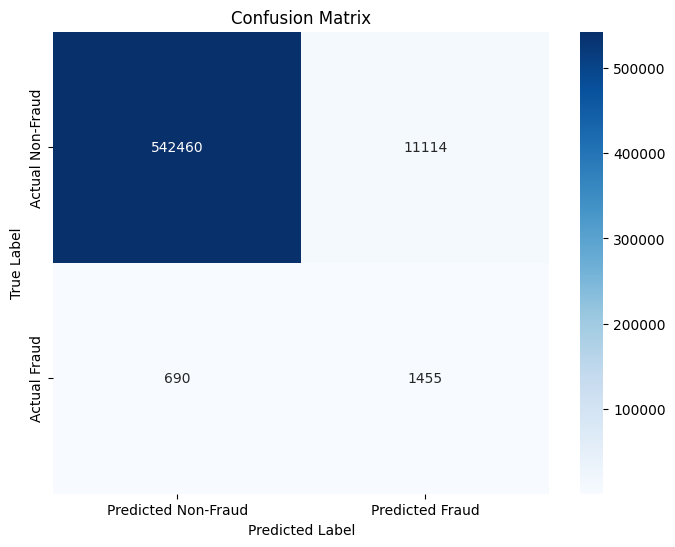

   Accuracy  Precision    Recall  F1 Score
0  0.978759   0.115761  0.678322  0.197771


In [31]:
metrics = evaluate_fraud_predictions(final_df, y)
print(pd.DataFrame([metrics]))

In [ ]:
 # Example Usage:
if __name__ == "__main__":
    # Load raw data
    raw_df = pd.read_csv('transactions.csv')
    
    # Run pipeline
    try:
        results_df, predictions = preprocess_and_predict(
            raw_data=raw_df,
            model_path='fraud_detection_model.joblib'
        )
        
        print("\nPredictions generated successfully:")
        print(results_df[['trans_num', 'predicted_fraud', 'fraud_probability']].head())
        
        # Save results
        results_df.to_csv('processed_transactions_with_predictions.csv', index=False)
        print("\nResults saved to 'processed_transactions_with_predictions.csv'")
        
    except Exception as e:
        print(f"Pipeline failed: {str(e)}")